In [2]:
pip install umap-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=5594b6f4e0311a364e57d273a15b19b1049f52868ff838696d9429222632ae0f
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=f61e3fbf24e9acfe22ca1760e34e246cb1e676c8c5a1f258deba7a13d6e35d7f
  Stored in directory: /root/.cache/pip/wheels/12/f9/4d/ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


In [3]:
import umap

In [4]:
#Mount the drive
import pandas as pd
import numpy as np

# Mount the Google Drive folder
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set the file path/
# folder_id = '1234567890abcdefg'

folder_path = '/content/drive/MyDrive/audio_features/Chroma_audio_features'


# # Read the file using pandas
df = np.load(folder_path + '/trial_lie_001_000_Chroma.npy')
df
df.shape

In [33]:
#check for null values and shape of the df
null_mask = np.isnan(df)
null_count = np.sum(null_mask)

print("Number of null values:", null_count)


Number of null values: 0


Normalize the files in the folder


In [12]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/gdrive')

#normalize the files in the folder
# import os
# import numpy as np

# def normalize_folder(folder_path):
#     """
#     Normalizes all the audio feature files in a folder.

#     Args:
#         folder_path (str): Path to the folder containing audio feature files.

#     Returns:
#         None
#     """
#     # Get list of feature files
#     feature_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]

#     # Normalize each feature file
#     for file in feature_files:
#         # Load feature file
#         file_path = os.path.join(folder_path, file)
#         features = np.load(file_path)

#         # Calculate mean and standard deviation
#         mean = np.mean(features, axis=0)
#         std = np.std(features, axis=0)

#         # Normalize features
#         normalized_features = (features - mean) / std

#         # Save normalized features
#         normalized_file_path = os.path.join(folder_path, 'normalized', file)
#         np.save(normalized_file_path, normalized_features)


In [13]:
# normalize_folder(folder_path)

<ipython-input-12-c9e2e7fe438d>:32: RuntimeWarning: invalid value encountered in true_divide
  normalized_features = (features - mean) / std


In [26]:
# folder_path_normal = '/content/drive/MyDrive/audio_features/Chroma_audio_features/normalized/'
# df_normalized = np.load(folder_path_normal + 'trial_lie_001_000_Chroma.npy')
# df_normalized
# df_normalized.shape

(12, 182)

In [34]:
null_mask = np.isnan(df_normalized)
null_count = np.sum(null_mask)

print("Number of null values:", null_count)


Number of null values: 0


IMPLEMENT UMAP

NORMALIZATION AND UMAP

In [44]:
# import os
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# import umap

# def normalize_and_reduce_dimensionality_npy(dir_path, n_neighbors=10, min_dist=0.1, n_components=2):
#     """
#     Normalizes the data in all .npy files in a directory, and applies UMAP to reduce the dimensionality of the data.
    
#     Parameters:
#     - dir_path (str): Path to the directory containing the .npy files.
#     - n_neighbors (int): Number of neighbors to use for UMAP. Default is 10.
#     - min_dist (float): Minimum distance between points in the UMAP embedding. Default is 0.1.
#     - n_components (int): Number of dimensions in the UMAP embedding. Default is 2.
    
#     Returns:
#     - umap_result (numpy.ndarray): Numpy array containing the UMAP result with shape (n_samples, n_components).
#     """
#     # get a list of all .npy files in the directory
#     file_list = [f for f in os.listdir(dir_path) if f.endswith('.npy')]
    
#     # read in each file and normalize the data
#     normalized_data = []
#     max_shape = None
#     for file_name in file_list:
#         file_path = os.path.join(dir_path, file_name)
#         arr = np.load(file_path)
#         scaler = MinMaxScaler()
#         normalized_arr = scaler.fit_transform(arr)
#         normalized_data.append(normalized_arr)
#         if max_shape is None:
#             max_shape = normalized_arr.shape
#         else:
#             max_shape = tuple(max(max_shape[i], normalized_arr.shape[i]) for i in range(len(max_shape)))
    
#     # pad the smaller arrays with zeros to make them all the same shape
#     for i in range(len(normalized_data)):
#         padded_arr = np.zeros(max_shape)
#         padded_arr[:normalized_data[i].shape[0], :normalized_data[i].shape[1]] = normalized_data[i]
#         normalized_data[i] = padded_arr
    
#     # concatenate the normalized data into a single array
#     combined_data = np.concatenate(normalized_data, axis=0)
    
#     # apply UMAP to the normalized data
#     umap_result = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components).fit_transform(combined_data)
    
#     return umap_result


In [48]:
# umap_result = normalize_and_reduce_dimensionality_npy('/content/drive/MyDrive/audio_features/Chroma_audio_features/')


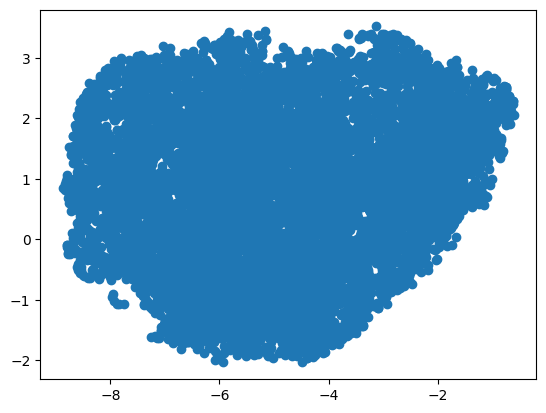

In [47]:
# import matplotlib.pyplot as plt

# plt.scatter(umap_result[:, 0], umap_result[:, 1])
# plt.show()

In [49]:
# import os
# import numpy as np
# from sklearn.preprocessing import MinMaxScaler
# import umap

# def normalize_and_reduce_dimensionality_npy(dir_path, n_neighbors=10, min_dist=0.1, n_components=2):
#     """
#     Normalizes the data in all .npy files in a directory, and applies UMAP to reduce the dimensionality of the data.
    
#     Parameters:
#     - dir_path (str): Path to the directory containing the .npy files.
#     - n_neighbors (int): Number of neighbors to use for UMAP. Default is 10.
#     - min_dist (float): Minimum distance between points in the UMAP embedding. Default is 0.1.
#     - n_components (int): Number of dimensions in the UMAP embedding. Default is 2.
    
#     Returns:
#     - umap_result (numpy.ndarray): Numpy array containing the UMAP result with shape (n_samples, n_components).
#     """
#     # get a list of all .npy files in the directory
#     file_list = [f for f in os.listdir(dir_path) if f.endswith('.npy')]
    
#     # read in each file and normalize the data
#     normalized_data = []
#     max_shape = None
#     for file_name in file_list:
#         file_path = os.path.join(dir_path, file_name)
#         arr = np.load(file_path)
#         scaler = MinMaxScaler()
#         normalized_arr = scaler.fit_transform(arr)
#         normalized_data.append(normalized_arr)
#         if max_shape is None:
#             max_shape = normalized_arr.shape
#         else:
#             max_shape = tuple(max(max_shape[i], normalized_arr.shape[i]) for i in range(len(max_shape)))
    
#     # pad the smaller arrays with zeros to make them all the same shape
#     for i in range(len(normalized_data)):
#         padded_arr = np.zeros(max_shape)
#         padded_arr[:normalized_data[i].shape[0], :normalized_data[i].shape[1]] = normalized_data[i]
#         normalized_data[i] = padded_arr
    
#     # concatenate the normalized data into a single array
#     combined_data = np.concatenate(normalized_data, axis=0)
    
#     # apply UMAP to the normalized data
#     umap_result = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components).fit_transform(combined_data)
    
#     return pd.DataFrame(umap_result)


In [50]:
# umap_result = normalize_and_reduce_dimensionality_npy('/content/drive/MyDrive/audio_features/Chroma_audio_features/')


In [51]:
# umap_result

,0,1
0,16.137270,0.185248
1,16.302183,0.073525
2,15.493646,0.548300
3,15.391591,0.786411
4,15.820509,1.965197
...,...,...
9943,14.312696,2.532525
9944,12.317046,3.636178
9945,11.994483,3.033478
9946,13.348398,-0.749543


## NORMALIZE AND REDUCE DIMENSIONALITY



This code will read in all the .npy files from the specified input directory, normalize the data in each file, apply UMAP to each normalized file, and save the resulting reduced dimensionality output to the specified output directory. Each output file will have the same name as the corresponding input file, but will be saved to the output directory instead.

In [6]:
#before swapping axis
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import umap

def normalize_and_reduce_dimensionality_npy(input_dir, output_dir, n_neighbors=10, min_dist=0.1, n_components=2):
    """
    Normalizes the data in all .npy files in the input directory, applies UMAP to each file, and saves the 
    resulting reduced dimensionality output to the output directory.
    
    Parameters:
    - input_dir (str): Path to the directory containing the input .npy files.
    - output_dir (str): Path to the directory where the output files will be saved.
    - n_neighbors (int): Number of neighbors to use for UMAP. Default is 10.
    - min_dist (float): Minimum distance between points in the UMAP embedding. Default is 0.1.
    - n_components (int): Number of dimensions in the UMAP embedding. Default is 2.
    
    Returns:
    None
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # get a list of all .npy files in the input directory
    file_list = [f for f in os.listdir(input_dir) if f.endswith('.npy')]
    
    # loop through each file, normalize the data and apply UMAP, and save the output to a new file
    for file_name in file_list:
        file_path = os.path.join(input_dir, file_name)
        arr = np.load(file_path)
        scaler = MinMaxScaler()
        normalized_arr = scaler.fit_transform(arr)
        umap_result = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components).fit_transform(normalized_arr)
        output_file_path = os.path.join(output_dir, file_name)
        np.save(output_file_path, umap_result)




In [5]:
#after swapping axis
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import umap

def normalize_and_reduce_dimensionality_npy_1(input_dir, output_dir, n_neighbors=5, min_dist=0.1, n_components=2):
    """
    Normalizes the data in all .npy files in the input directory, applies UMAP to each file, and saves the 
    resulting reduced dimensionality output to the output directory.
    
    Parameters:
    - input_dir (str): Path to the directory containing the input .npy files.
    - output_dir (str): Path to the directory where the output files will be saved.
    - n_neighbors (int): Number of neighbors to use for UMAP. Default is 10.
    - min_dist (float): Minimum distance between points in the UMAP embedding. Default is 0.1.
    - n_components (int): Number of dimensions in the UMAP embedding. Default is 2.
    
    Returns:
    None
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # get a list of all .npy files in the input directory
    file_list = [f for f in os.listdir(input_dir) if f.endswith('.npy')]
    
    # loop through each file, swap the axis, normalize the data and apply UMAP, and save the output to a new file
    for file_name in file_list:
        file_path = os.path.join(input_dir, file_name)
        arr = np.load(file_path)
        arr = arr.T  # swap the axis
        scaler = MinMaxScaler()
        normalized_arr = scaler.fit_transform(arr)
        umap_result = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components).fit_transform(normalized_arr)
        output_file_path = os.path.join(output_dir, file_name)
        np.save(output_file_path, umap_result)


## CHROMA FEATURES

In [69]:
##old Dimensions
folder_path = '/content/drive/MyDrive/audio_features/Chroma_audio_features'
df = np.load(folder_path + '/trial_lie_001_000_Chroma.npy')
df
df.shape

(12, 182)

In [53]:
#run the dim reduction function before axis swap
input_dir = '/content/drive/MyDrive/audio_features/Chroma_audio_features'
output_dir = '/content/drive/MyDrive/audio_features/Chroma_audio_features/UMAP_output'
normalize_and_reduce_dimensionality_npy(input_dir, output_dir)

In [57]:
#checking for the new dimensions before swap
folder_path_umap = '/content/drive/MyDrive/audio_features/Chroma_audio_features/UMAP_Chroma_output/'
df_umap = np.load(folder_path_umap + 'trial_lie_001_000_Chroma.npy')
df_umap
df_umap.shape

(12, 2)

In [ ]:
#run the dim reduction function after axis swap
input_dir = '/content/drive/MyDrive/audio_features/Chroma_audio_features'
output_dir = '/content/drive/MyDrive/audio_features/Chroma_audio_features/UMAP_output_1'
normalize_and_reduce_dimensionality_npy_1(input_dir, output_dir)

In [ ]:
#checking for the new dimensions after swap
folder_path_umap = '/content/drive/MyDrive/audio_features/Chroma_audio_features/UMAP_Chroma_output_1/'
df_umap = np.load(folder_path_umap + 'trial_lie_001_000_Chroma.npy')
df_umap
df_umap.shape

## MFCC FEATURES 

In [70]:
#old Dimensions
folder_path_mfcc_og = '/content/drive/MyDrive/audio_features/MFCC_audio_features/'
df_mfcc_og = np.load(folder_path_mfcc_og + 'trial_lie_001_000_MFCC.npy')
df_mfcc_og
df_mfcc_og.shape

(20, 182)

In [58]:
#run the dim reduction function
input_dir = '/content/drive/MyDrive/audio_features/MFCC_audio_features'
output_dir = '/content/drive/MyDrive/audio_features/MFCC_audio_features/UMAP_mfcc_output'
normalize_and_reduce_dimensionality_npy(input_dir, output_dir)

In [60]:
#checking for the new dimensions
folder_path_mfcc = '/content/drive/MyDrive/audio_features/MFCC_audio_features/UMAP_mfcc_output/'
df_mfcc = np.load(folder_path_mfcc + 'trial_lie_001_000_MFCC.npy')
df_mfcc
df_mfcc.shape

(20, 2)

In [74]:
#run the dim reduction function
input_dir = '/content/drive/MyDrive/audio_features/MFCC_audio_features'
output_dir = '/content/drive/MyDrive/audio_features/MFCC_audio_features/UMAP_mfcc_output_1'
normalize_and_reduce_dimensionality_npy_1(input_dir, output_dir)


/usr/local/lib/python3.9/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.9/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.9/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: ignored

## RMS FEATURES 

In [68]:
#old Dimensions
folder_path_rms_og = '/content/drive/MyDrive/audio_features/RMS_audio_features/'
df_rms_og = np.load(folder_path_rms_og + 'trial_lie_001_000_RMS.npy')
df_rms_og
df_rms_og.shape

(1, 182)

In [72]:
#run the dim reduction function
input_dir = '/content/drive/MyDrive/audio_features/RMS_audio_features'
output_dir = '/content/drive/MyDrive/audio_features/RMS_audio_features/UMAP_rms_output'
normalize_and_reduce_dimensionality_npy(input_dir, output_dir)

/usr/local/lib/python3.9/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.9/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(
/usr/local/lib/python3.9/dist-packages/umap/umap_.py:2344: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


KeyboardInterrupt: ignored

In [64]:
#checking for the new dimensions
folder_path_rms = '/content/drive/MyDrive/audio_features/RMS_audio_features/UMAP_rms_output/'
df_rms = np.load(folder_path_rms + 'trial_lie_001_000_RMS.npy')
df_rms
df_rms.shape

(1, 2)